In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

source_file_path = os.path.abspath("AD_Crime_Reports_2022.csv")
parent_folder = os.path.dirname(source_file_path)
grandparent_folder = os.path.dirname(parent_folder)

crime_file22 = os.path.join(grandparent_folder,"P1_Resources", "AD_Crime_Reports_2022.csv")
crime_df22 = pd.read_csv(crime_file22, low_memory=False, encoding="Latin-1")

crime_file21 = os.path.join(grandparent_folder,"P1_Resources", "AD_Crime_Reports_2021.csv")
crime_df21 = pd.read_csv(crime_file21, low_memory=False, encoding="Latin-1")

crime_file19 = os.path.join(grandparent_folder,"P1_Resources", "AD_Crime_Reports_2019.csv")
crime_df19 = pd.read_csv(crime_file19, low_memory=False, encoding="Latin-1")


# To view the headers, you can use the columns attribute of the DataFrame
headers22 = crime_df22.columns
headers21 = crime_df21.columns
headers19 = crime_df19.columns


# print(grandparent_folder)
# print(headers22)
# print(headers21)
# print(headers19)



In [2]:
# Convert the "Date" column to datetime data type
crime_df19['Occurred Date Time'] = pd.to_datetime(crime_df19['Occurred Date Time'])
crime_df21['Occurred Date Time'] = pd.to_datetime(crime_df21['Occurred Date Time'])
crime_df22['Occurred Date Time'] = pd.to_datetime(crime_df22['Occurred Date Time'])


# Filter the data to only include records from the year 2020-2022
crime_df19 = crime_df19[crime_df19['Occurred Date Time'].dt.year == 2019]
crime_df21 = crime_df21[crime_df21['Occurred Date Time'].dt.year == 2021]
crime_df22 = crime_df22[crime_df22['Occurred Date Time'].dt.year == 2022]


# Extract the month from the "Occurred Date" column and create a new column 'Month'
crime_df19['Month'] = crime_df19['Occurred Date Time'].dt.month
crime_df19['Year'] = crime_df19['Occurred Date Time'].dt.year

crime_df21['Month'] = crime_df21['Occurred Date Time'].dt.month
crime_df21['Year'] = crime_df21['Occurred Date Time'].dt.year

crime_df22['Month'] = crime_df22['Occurred Date Time'].dt.month
crime_df22['Year'] = crime_df22['Occurred Date Time'].dt.year


# Group the data by "Zip Code" and calculate the average number of crimes per month in 2020-2022
crimes_by_zip_month_19 = crime_df19.groupby(['Year', 'Month']).size().reset_index(name='No. of Crimes')
crimes_by_zip_month_21 = crime_df21.groupby(['Year', 'Month']).size().reset_index(name='No. of Crimes')
crimes_by_zip_month_22 = crime_df22.groupby(['Year', 'Month']).size().reset_index(name='No. of Crimes')

crimes_by_zip_month_19.dropna(inplace=True)
crimes_by_zip_month_21.dropna(inplace=True)
crimes_by_zip_month_22.dropna(inplace=True)

#crimes_by_zip_month_20['Zip Code'] = crimes_by_zip_month_20['Zip Code'].astype(int)
crimes_by_zip_month_19['No. of Crimes'] = crimes_by_zip_month_19['No. of Crimes'].astype(int)

#crimes_by_zip_month_21['Zip Code'] = crimes_by_zip_month_21['Zip Code'].astype(int)
crimes_by_zip_month_21['No. of Crimes'] = crimes_by_zip_month_21['No. of Crimes'].astype(int)

#crimes_by_zip_month_22['Zip Code'] = crimes_by_zip_month_22['Zip Code'].astype(int)
crimes_by_zip_month_22['No. of Crimes'] = crimes_by_zip_month_22['No. of Crimes'].astype(int)
crime_df22.dropna(subset=['Latitude', 'Longitude'], inplace=True)

crime_df22.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,Month,Year
1,202221365,FAMILY DISTURBANCE,3400,N,2022-01-02 22:28:00,01/02/2022,2228,01/02/2022 10:28:00 PM,01/02/2022,2228,...,01/03/2023,NaN,NaN,3099115.0,10026946.0,30.148609,-97.794104,POINT (-97.79410351 30.14860935),1,2022
5,202220295,FAMILY DISTURBANCE,3400,N,2022-01-02 06:40:00,01/02/2022,640,01/02/2022 06:40:00 AM,01/02/2022,640,...,04/15/2022,NaN,NaN,3141600.0,10117563.0,30.394960,-97.652823,POINT (-97.6528231 30.39495992),1,2022
7,202220601,AUTO THEFT,700,N,2022-01-02 07:10:00,01/02/2022,710,01/02/2022 01:05:00 PM,01/02/2022,1305,...,01/18/2022,240,Auto Theft,3133248.0,10084440.0,30.304461,-97.681811,POINT (-97.68181067 30.3044613),1,2022
8,202220188,DWI,2100,N,2022-01-02 02:38:00,01/02/2022,238,01/02/2022 02:38:00 AM,01/02/2022,238,...,01/02/2022,NaN,NaN,3116293.0,10068206.0,30.260936,-97.736725,POINT (-97.73672471 30.26093643),1,2022
9,202210530,ASSAULT W/INJURY-FAM/DATE VIOL,900,Y,2022-01-01 04:00:00,01/01/2022,400,01/02/2022 04:44:00 AM,01/02/2022,444,...,01/03/2022,NaN,NaN,3118423.0,10058327.0,30.233644,-97.730712,POINT (-97.73071195 30.23364383),1,2022


In [3]:
combined_data = pd.concat([crime_df19, crime_df21, crime_df22])
combined_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

combined_data.head()


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,Month,Year
9,201921365.0,THEFT BY SHOPLIFTING,607,N,2019-01-02 21:15:00,1/2/19,2115,1/2/19 21:15,1/2/19,2115,...,1/2/19,23C,Theft,3110589.0,10052675.0,30.218609,-97.755927,POINT (-97.75592656 30.21860888),1,2019
10,201921565.0,CRIMINAL MISCHIEF,1400,N,2019-01-02 23:49:00,1/2/19,2349,1/2/19 23:49,1/2/19,2349,...,2/5/19,NaN,NaN,3113088.0,10066368.0,30.256089,-97.747009,POINT (-97.74700892 30.25608933),1,2019
12,201912342.0,THEFT,600,N,2019-01-02 01:11:00,1/2/19,111,1/2/19 1:11,1/2/19,111,...,1/2/19,23H,Theft,3097030.0,10045648.0,30.200149,-97.799351,POINT (-97.79935052 30.20014913),1,2019
13,201921428.0,VIOL CITY ORDINANCE - OTHER,3299,N,2019-01-02 22:28:00,1/2/19,2228,1/2/19 22:28,1/2/19,2228,...,NaN,NaN,NaN,3150866.0,10082058.0,30.296747,-97.626182,POINT (-97.62618194 30.296747),1,2019
14,201920984.0,FAMILY DISTURBANCE/PARENTAL,3458,N,2019-01-02 16:00:00,1/2/19,1600,1/2/19 17:03,1/2/19,1703,...,1/8/19,NaN,NaN,3128184.0,10057597.0,30.231006,-97.699867,POINT (-97.69986679 30.2310056),1,2019


In [4]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    radius_of_earth = 6371  # Earth's radius in kilometers
    distance = radius_of_earth * c

    return distance

In [7]:
# Count the number of crimes per zipcode
crime_count_per_zipcode = combined_data['Zip Code'].value_counts()

# Optionally, you can sort the results by the number of crimes in descending order
crime_count_per_zipcode = crime_count_per_zipcode.sort_values(ascending=False)

# Display the crime count per zipcode
#print(crime_count_per_zipcode)

In [13]:
# Function to categorize the location based on distance from downtown Austin
def categorize_location(lat, lon):
    distance = haversine(downtown_lat, downtown_lon, lat, lon)
    
    if distance <= 23.36:    # 2.5 miles (Downtown)
        return 'Downtown'
    elif distance <= 5058.4:  # 7.5 miles (Midtown)
        return 'Midtown'
    elif distance <= 16093.44: # 10 miles (Suburbs)
        return 'Suburbs'
    else:                      # 15 miles (Outskirts)
        return 'Outskirts'

# Apply the categorize_location function to create the new 'Location Category' column
combined_data['Location Category'] = combined_data.apply(lambda row: categorize_location(row['Latitude'], row['Longitude']), axis=1)

combined_data

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,Month,Year,Location Category
9,2.019214e+08,THEFT BY SHOPLIFTING,607,N,2019-01-02 21:15:00,1/2/19,2115,1/2/19 21:15,1/2/19,2115,...,23C,Theft,3110589.0,10052675.0,30.218609,-97.755927,POINT (-97.75592656 30.21860888),1,2019,Downtown
10,2.019216e+08,CRIMINAL MISCHIEF,1400,N,2019-01-02 23:49:00,1/2/19,2349,1/2/19 23:49,1/2/19,2349,...,NaN,NaN,3113088.0,10066368.0,30.256089,-97.747009,POINT (-97.74700892 30.25608933),1,2019,Downtown
12,2.019123e+08,THEFT,600,N,2019-01-02 01:11:00,1/2/19,111,1/2/19 1:11,1/2/19,111,...,23H,Theft,3097030.0,10045648.0,30.200149,-97.799351,POINT (-97.79935052 30.20014913),1,2019,Downtown
13,2.019214e+08,VIOL CITY ORDINANCE - OTHER,3299,N,2019-01-02 22:28:00,1/2/19,2228,1/2/19 22:28,1/2/19,2228,...,NaN,NaN,3150866.0,10082058.0,30.296747,-97.626182,POINT (-97.62618194 30.296747),1,2019,Downtown
14,2.019210e+08,FAMILY DISTURBANCE/PARENTAL,3458,N,2019-01-02 16:00:00,1/2/19,1600,1/2/19 17:03,1/2/19,1703,...,NaN,NaN,3128184.0,10057597.0,30.231006,-97.699867,POINT (-97.69986679 30.2310056),1,2019,Downtown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87631,2.022365e+10,AGG ASSAULT,402,N,2022-12-31 18:55:00,12/31/2022,1855,12/31/2022 06:55:00 PM,12/31/2022,1855,...,13A,Aggravated Assault,3120997.0,10079537.0,30.291781,-97.720986,POINT (-97.72098647 30.29178072),12,2022,Downtown
87632,2.022802e+10,BURGLARY OF RESIDENCE,500,N,2022-12-30 20:00:00,12/30/2022,2000,12/31/2022 08:25:00 PM,12/31/2022,2025,...,220,Burglary,3090828.0,10047484.0,30.205583,-97.818846,POINT (-97.81884619 30.20558298),12,2022,Downtown
87633,2.022365e+10,AGG ASSAULT WITH MOTOR VEH,406,N,2022-12-31 23:45:00,12/31/2022,2345,12/31/2022 11:52:00 PM,12/31/2022,2352,...,13A,Aggravated Assault,3122163.0,10102820.0,30.355707,-97.715557,POINT (-97.71555725 30.35570659),12,2022,Downtown
87634,2.022365e+10,POSSESSION OF MARIJUANA,1803,N,2022-12-31 23:26:00,12/31/2022,2326,12/31/2022 11:26:00 PM,12/31/2022,2326,...,NaN,NaN,3115586.0,10070497.0,30.267279,-97.738794,POINT (-97.73879424 30.26727938),12,2022,Downtown


In [18]:
# Filter crimes within 100 miles from downtown
crimes_within_100_miles = combined_data[combined_data['Distance to Downtown (miles)'] <= 100]

# Filter to show only "Year" 2019
crimes_within_100_miles_2019 = crimes_within_100_miles.loc[crimes_within_100_miles['Year'] == 2019]
crimes_within_100_miles_2021 = crimes_within_100_miles.loc[crimes_within_100_miles['Year'] == 2021]
crimes_within_100_miles_2022 = crimes_within_100_miles.loc[crimes_within_100_miles['Year'] == 2022]
# # Display the filtered DataFrame with crimes within 100 miles from downtown in the year 2019
# Create 'Distance to Downtown (miles)' column by applying the calculate_distance function
combined_data['Distance to Downtown (miles)'] = combined_data.apply(calculate_distance, axis=1)

# Filter crimes within 100 miles from downtown
crimes_within_100_miles = combined_data[combined_data['Distance to Downtown (miles)'] <= 100]


# print(crimes_within_100_miles_2019)

In [19]:
import pandas as pd
import geopy.distance

# Define the coordinates for downtown Austin
downtown_lat = 30.2672
downtown_lon = -97.7431

# Assuming you have already defined 'combined_data' DataFrame with 'Distance to Downtown (miles)' column

# Filter crimes within 100 miles from downtown
crimes_within_100_miles = combined_data[combined_data['Distance to Downtown (miles)'] <= 100]

# Display the filtered DataFrame with crimes within 100 miles from downtown
crimes_within_100_miles

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,Month,Year,Location Category,Distance to Downtown (miles)
9,2.019214e+08,THEFT BY SHOPLIFTING,607,N,2019-01-02 21:15:00,1/2/19,2115,1/2/19 21:15,1/2/19,2115,...,Theft,3110589.0,10052675.0,30.218609,-97.755927,POINT (-97.75592656 30.21860888),1,2019,Downtown,3.433888
10,2.019216e+08,CRIMINAL MISCHIEF,1400,N,2019-01-02 23:49:00,1/2/19,2349,1/2/19 23:49,1/2/19,2349,...,NaN,3113088.0,10066368.0,30.256089,-97.747009,POINT (-97.74700892 30.25608933),1,2019,Downtown,0.800236
12,2.019123e+08,THEFT,600,N,2019-01-02 01:11:00,1/2/19,111,1/2/19 1:11,1/2/19,111,...,Theft,3097030.0,10045648.0,30.200149,-97.799351,POINT (-97.79935052 30.20014913),1,2019,Downtown,5.714186
13,2.019214e+08,VIOL CITY ORDINANCE - OTHER,3299,N,2019-01-02 22:28:00,1/2/19,2228,1/2/19 22:28,1/2/19,2228,...,NaN,3150866.0,10082058.0,30.296747,-97.626182,POINT (-97.62618194 30.296747),1,2019,Downtown,7.280073
14,2.019210e+08,FAMILY DISTURBANCE/PARENTAL,3458,N,2019-01-02 16:00:00,1/2/19,1600,1/2/19 17:03,1/2/19,1703,...,NaN,3128184.0,10057597.0,30.231006,-97.699867,POINT (-97.69986679 30.2310056),1,2019,Downtown,3.591763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87631,2.022365e+10,AGG ASSAULT,402,N,2022-12-31 18:55:00,12/31/2022,1855,12/31/2022 06:55:00 PM,12/31/2022,1855,...,Aggravated Assault,3120997.0,10079537.0,30.291781,-97.720986,POINT (-97.72098647 30.29178072),12,2022,Downtown,2.148205
87632,2.022802e+10,BURGLARY OF RESIDENCE,500,N,2022-12-30 20:00:00,12/30/2022,2000,12/31/2022 08:25:00 PM,12/31/2022,2025,...,Burglary,3090828.0,10047484.0,30.205583,-97.818846,POINT (-97.81884619 30.20558298),12,2022,Downtown,6.208042
87633,2.022365e+10,AGG ASSAULT WITH MOTOR VEH,406,N,2022-12-31 23:45:00,12/31/2022,2345,12/31/2022 11:52:00 PM,12/31/2022,2352,...,Aggravated Assault,3122163.0,10102820.0,30.355707,-97.715557,POINT (-97.71555725 30.35570659),12,2022,Downtown,6.314987
87634,2.022365e+10,POSSESSION OF MARIJUANA,1803,N,2022-12-31 23:26:00,12/31/2022,2326,12/31/2022 11:26:00 PM,12/31/2022,2326,...,NaN,3115586.0,10070497.0,30.267279,-97.738794,POINT (-97.73879424 30.26727938),12,2022,Downtown,0.257510


In [52]:
crimes_within_100_miles

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,Month,Year,Location Category,Distance to Downtown (miles)
9,2.019214e+08,THEFT BY SHOPLIFTING,607,N,2019-01-02 21:15:00,1/2/19,2115,1/2/19 21:15,1/2/19,2115,...,Theft,3110589.0,10052675.0,30.218609,-97.755927,POINT (-97.75592656 30.21860888),1,2019,Downtown,3.433888
10,2.019216e+08,CRIMINAL MISCHIEF,1400,N,2019-01-02 23:49:00,1/2/19,2349,1/2/19 23:49,1/2/19,2349,...,NaN,3113088.0,10066368.0,30.256089,-97.747009,POINT (-97.74700892 30.25608933),1,2019,Downtown,0.800236
12,2.019123e+08,THEFT,600,N,2019-01-02 01:11:00,1/2/19,111,1/2/19 1:11,1/2/19,111,...,Theft,3097030.0,10045648.0,30.200149,-97.799351,POINT (-97.79935052 30.20014913),1,2019,Downtown,5.714186
13,2.019214e+08,VIOL CITY ORDINANCE - OTHER,3299,N,2019-01-02 22:28:00,1/2/19,2228,1/2/19 22:28,1/2/19,2228,...,NaN,3150866.0,10082058.0,30.296747,-97.626182,POINT (-97.62618194 30.296747),1,2019,Downtown,7.280073
14,2.019210e+08,FAMILY DISTURBANCE/PARENTAL,3458,N,2019-01-02 16:00:00,1/2/19,1600,1/2/19 17:03,1/2/19,1703,...,NaN,3128184.0,10057597.0,30.231006,-97.699867,POINT (-97.69986679 30.2310056),1,2019,Downtown,3.591763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87631,2.022365e+10,AGG ASSAULT,402,N,2022-12-31 18:55:00,12/31/2022,1855,12/31/2022 06:55:00 PM,12/31/2022,1855,...,Aggravated Assault,3120997.0,10079537.0,30.291781,-97.720986,POINT (-97.72098647 30.29178072),12,2022,Downtown,2.148205
87632,2.022802e+10,BURGLARY OF RESIDENCE,500,N,2022-12-30 20:00:00,12/30/2022,2000,12/31/2022 08:25:00 PM,12/31/2022,2025,...,Burglary,3090828.0,10047484.0,30.205583,-97.818846,POINT (-97.81884619 30.20558298),12,2022,Downtown,6.208042
87633,2.022365e+10,AGG ASSAULT WITH MOTOR VEH,406,N,2022-12-31 23:45:00,12/31/2022,2345,12/31/2022 11:52:00 PM,12/31/2022,2352,...,Aggravated Assault,3122163.0,10102820.0,30.355707,-97.715557,POINT (-97.71555725 30.35570659),12,2022,Downtown,6.314987
87634,2.022365e+10,POSSESSION OF MARIJUANA,1803,N,2022-12-31 23:26:00,12/31/2022,2326,12/31/2022 11:26:00 PM,12/31/2022,2326,...,NaN,3115586.0,10070497.0,30.267279,-97.738794,POINT (-97.73879424 30.26727938),12,2022,Downtown,0.257510


In [51]:
# Filter to show only "Year" 2019, 2021, and 2022
crimes_within_100_miles_2019 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2019]
crimes_within_100_miles_2021 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2021]
crimes_within_100_miles_2022 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2022]

# Get the top 5 crimes based on the "Highest Offense Description" for each year
top_5_crimes_2019 = crimes_within_100_miles_2019['Highest Offense Description'].value_counts().nlargest(5)
top_5_crimes_2021 = crimes_within_100_miles_2021['Highest Offense Description'].value_counts().nlargest(5)
top_5_crimes_2022 = crimes_within_100_miles_2022['Highest Offense Description'].value_counts().nlargest(5)

# Display the top 5 crimes for each year
print("Top 5 Crimes for 2019:")
print(top_5_crimes_2019)

print("\nTop 5 Crimes for 2021:")
print(top_5_crimes_2021)

print("\nTop 5 Crimes for 2022:")
print(top_5_crimes_2022)


Top 5 Crimes for 2019:
BURGLARY OF VEHICLE               11693
FAMILY DISTURBANCE                10346
THEFT                              9386
CRIMINAL MISCHIEF                  5491
ASSAULT W/INJURY-FAM/DATE VIOL     3304
Name: Highest Offense Description, dtype: int64

Top 5 Crimes for 2021:
FAMILY DISTURBANCE     9629
THEFT                  5554
BURGLARY OF VEHICLE    4916
CRIMINAL MISCHIEF      4370
AUTO THEFT             4343
Name: Highest Offense Description, dtype: int64

Top 5 Crimes for 2022:
FAMILY DISTURBANCE     8447
BURGLARY OF VEHICLE    8017
THEFT                  5173
AUTO THEFT             5024
CRIMINAL MISCHIEF      4286
Name: Highest Offense Description, dtype: int64


In [21]:
# Filter crimes within 100 miles from downtown
crimes_within_100_miles = combined_data[combined_data['Distance to Downtown (miles)'] <= 100]

# Filter to show only "Year" 2019
crimes_within_100_miles_2019 = crimes_within_100_miles.loc[crimes_within_100_miles['Year'] == 2019]
crimes_within_100_miles_2021 = crimes_within_100_miles.loc[crimes_within_100_miles['Year'] == 2021]
crimes_within_100_miles_2022 = crimes_within_100_miles.loc[crimes_within_100_miles['Year'] == 2022]
# # Display the filtered DataFrame with crimes within 100 miles from downtown in the year 2019
# print(crimes_within_100_miles_2019)


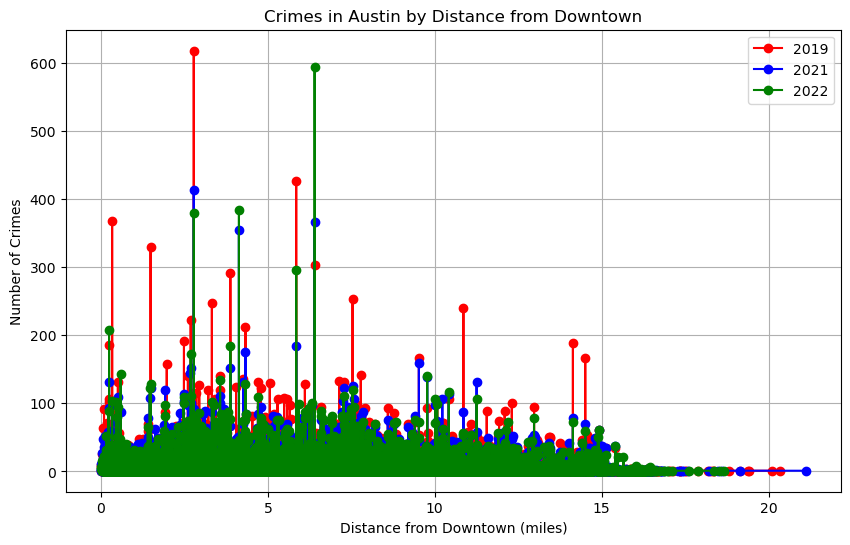

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import geopy.distance

# Define the coordinates for downtown Austin
downtown_lat = 30.2672
downtown_lon = -97.7431

# Assuming you have already defined 'combined_data' DataFrame with 'Distance to Downtown (miles)' column

# Filter crimes within 100 miles from downtown
crimes_within_100_miles = combined_data[combined_data['Distance to Downtown (miles)'] <= 100]

# Filter to show only "Year" 2019, 2021, and 2022
crimes_within_100_miles_2019 = crimes_within_100_miles.loc[crimes_within_100_miles['Year'] == 2019]
crimes_within_100_miles_2021 = crimes_within_100_miles.loc[crimes_within_100_miles['Year'] == 2021]
crimes_within_100_miles_2022 = crimes_within_100_miles.loc[crimes_within_100_miles['Year'] == 2022]

# Group crimes by distance from downtown and count the number of crimes in each group for each year
crime_counts_by_distance_2019 = crimes_within_100_miles_2019.groupby('Distance to Downtown (miles)').size()
crime_counts_by_distance_2021 = crimes_within_100_miles_2021.groupby('Distance to Downtown (miles)').size()
crime_counts_by_distance_2022 = crimes_within_100_miles_2022.groupby('Distance to Downtown (miles)').size()

# Sort the data based on the distance from downtown in ascending order for each year
crime_counts_by_distance_2019 = crime_counts_by_distance_2019.sort_index()
crime_counts_by_distance_2021 = crime_counts_by_distance_2021.sort_index()
crime_counts_by_distance_2022 = crime_counts_by_distance_2022.sort_index()

# Plot the line graphs for each year using different colors
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_distance_2019.index, crime_counts_by_distance_2019.values, marker='o', linestyle='-', label='2019', color='red')
plt.plot(crime_counts_by_distance_2021.index, crime_counts_by_distance_2021.values, marker='o', linestyle='-', label='2021', color='blue')
plt.plot(crime_counts_by_distance_2022.index, crime_counts_by_distance_2022.values, marker='o', linestyle='-', label='2022', color='green')
plt.xlabel('Distance from Downtown (miles)')
plt.ylabel('Number of Crimes')
plt.title('Crimes in Austin by Distance from Downtown')
plt.legend()
plt.grid(True)
plt.show()

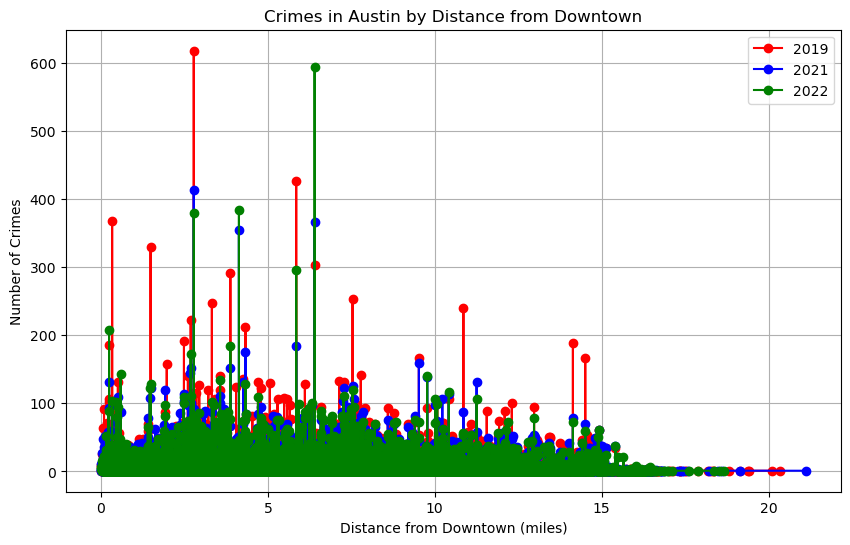

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import geopy.distance

# Define the coordinates for downtown Austin
downtown_lat = 30.2672
downtown_lon = -97.7431

# Assuming you have already defined 'combined_data' DataFrame

# Calculate the distance of each crime location from downtown
def calculate_distance(row):
    crime_coords = (row['Latitude'], row['Longitude'])
    downtown_coords = (downtown_lat, downtown_lon)
    return geopy.distance.geodesic(crime_coords, downtown_coords).miles

# Create 'Distance to Downtown (miles)' column by applying the calculate_distance function
combined_data['Distance to Downtown (miles)'] = combined_data.apply(calculate_distance, axis=1)

# Filter crimes within 100 miles from downtown
crimes_within_100_miles = combined_data[combined_data['Distance to Downtown (miles)'] <= 100]

# Filter to show only "Year" 2019, 2021, and 2022
crimes_within_100_miles_2019 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2019]
crimes_within_100_miles_2021 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2021]
crimes_within_100_miles_2022 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2022]

# Group crimes by distance from downtown and count the number of crimes in each group for each year
crime_counts_by_distance_2019 = crimes_within_100_miles_2019.groupby('Distance to Downtown (miles)').size()
crime_counts_by_distance_2021 = crimes_within_100_miles_2021.groupby('Distance to Downtown (miles)').size()
crime_counts_by_distance_2022 = crimes_within_100_miles_2022.groupby('Distance to Downtown (miles)').size()

# Sort the data based on the distance from downtown in ascending order for each year
crime_counts_by_distance_2019 = crime_counts_by_distance_2019.sort_index()
crime_counts_by_distance_2021 = crime_counts_by_distance_2021.sort_index()
crime_counts_by_distance_2022 = crime_counts_by_distance_2022.sort_index()

# Plot the line graphs for each year using different colors
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_distance_2019.index, crime_counts_by_distance_2019.values, marker='o', linestyle='-', label='2019', color='red')
plt.plot(crime_counts_by_distance_2021.index, crime_counts_by_distance_2021.values, marker='o', linestyle='-', label='2021', color='blue')
plt.plot(crime_counts_by_distance_2022.index, crime_counts_by_distance_2022.values, marker='o', linestyle='-', label='2022', color='green')
plt.xlabel('Distance from Downtown (miles)')
plt.ylabel('Number of Crimes')
plt.title('Crimes in Austin by Distance from Downtown')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Filter to show only "Year" 2019, 2021, and 2022
crimes_within_100_miles_2019 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2019]
crimes_within_100_miles_2021 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2021]
crimes_within_100_miles_2022 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2022]

# Get the top 5 "Highest Offense Description" for each year
top_5_offense_2019 = crimes_within_100_miles_2019['Highest Offense Description'].value_counts().head(5)
top_5_offense_2021 = crimes_within_100_miles_2021['Highest Offense Description'].value_counts().head(5)
top_5_offense_2022 = crimes_within_100_miles_2022['Highest Offense Description'].value_counts().head(5)

# Display the top 5 offenses for each year

top_5_offense_2019

BURGLARY OF VEHICLE               11693
FAMILY DISTURBANCE                10346
THEFT                              9386
CRIMINAL MISCHIEF                  5491
ASSAULT W/INJURY-FAM/DATE VIOL     3304
Name: Highest Offense Description, dtype: int64

In [38]:
top_5_offense_2021

FAMILY DISTURBANCE     9629
THEFT                  5554
BURGLARY OF VEHICLE    4916
CRIMINAL MISCHIEF      4370
AUTO THEFT             4343
Name: Highest Offense Description, dtype: int64

In [39]:
top_5_offense_2022

FAMILY DISTURBANCE     8447
BURGLARY OF VEHICLE    8017
THEFT                  5173
AUTO THEFT             5024
CRIMINAL MISCHIEF      4286
Name: Highest Offense Description, dtype: int64

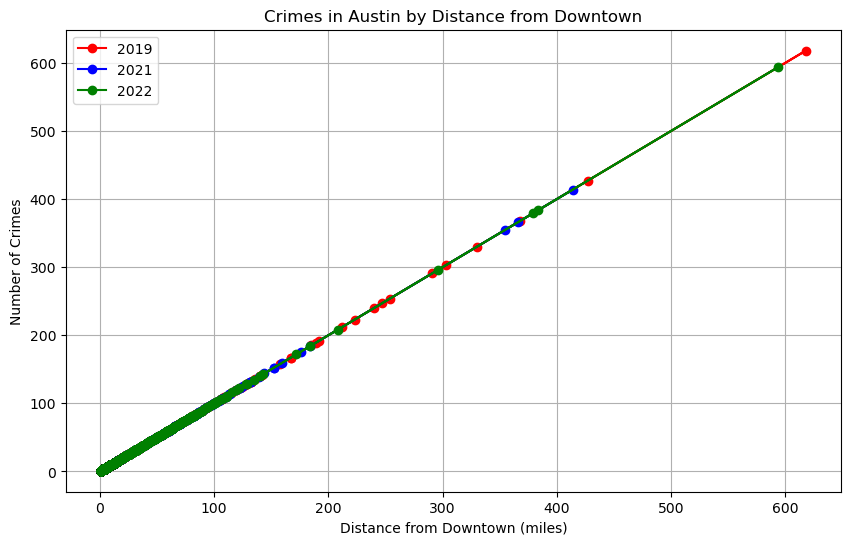

Top 5 Highest Offense Description for 2019:
BURGLARY OF VEHICLE               11693
FAMILY DISTURBANCE                10346
THEFT                              9386
CRIMINAL MISCHIEF                  5491
ASSAULT W/INJURY-FAM/DATE VIOL     3304
Name: Highest Offense Description, dtype: int64

Top 5 Highest Offense Description for 2021:
FAMILY DISTURBANCE     9629
THEFT                  5554
BURGLARY OF VEHICLE    4916
CRIMINAL MISCHIEF      4370
AUTO THEFT             4343
Name: Highest Offense Description, dtype: int64

Top 5 Highest Offense Description for 2022:
FAMILY DISTURBANCE     8447
BURGLARY OF VEHICLE    8017
THEFT                  5173
AUTO THEFT             5024
CRIMINAL MISCHIEF      4286
Name: Highest Offense Description, dtype: int64


In [54]:
# Define the coordinates for downtown Austin
downtown_lat = 30.2672
downtown_lon = -97.7431

# Assuming you have already defined 'combined_data' DataFrame

# Calculate the distance of each crime location from downtown
def calculate_distance(row):
    crime_coords = (row['Latitude'], row['Longitude'])
    downtown_coords = (downtown_lat, downtown_lon)
    return geopy.distance.geodesic(crime_coords, downtown_coords).miles

# Create 'Distance to Downtown (miles)' column by applying the calculate_distance function
combined_data['Distance to Downtown (miles)'] = combined_data.apply(calculate_distance, axis=1)

# Filter crimes within 100 miles from downtown
crimes_within_100_miles = combined_data[combined_data['Distance to Downtown (miles)'] <= 100]

# Filter to show only "Year" 2019, 2021, and 2022
crimes_within_100_miles_2019 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2019]
crimes_within_100_miles_2021 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2021]
crimes_within_100_miles_2022 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2022]

# Group crimes by distance from downtown and count the number of crimes in each group for each year
crime_counts_by_distance_2019 = crimes_within_100_miles_2019.groupby('Distance to Downtown (miles)').size()
crime_counts_by_distance_2021 = crimes_within_100_miles_2021.groupby('Distance to Downtown (miles)').size()
crime_counts_by_distance_2022 = crimes_within_100_miles_2022.groupby('Distance to Downtown (miles)').size()

# Sort the data based on the distance from downtown in ascending order for each year
# crime_counts_by_distance_2019 = crime_counts_by_distance_2019.sort_index()
# crime_counts_by_distance_2021 = crime_counts_by_distance_2021.sort_index()
# crime_counts_by_distance_2022 = crime_counts_by_distance_2022.sort_index()

# Plot the line graphs for each year using different colors
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_distance_2019.values, crime_counts_by_distance_2019.values, marker='o', linestyle='-', label='2019', color='red')
plt.plot(crime_counts_by_distance_2021.values, crime_counts_by_distance_2021.values, marker='o', linestyle='-', label='2021', color='blue')
plt.plot(crime_counts_by_distance_2022.values, crime_counts_by_distance_2022.values, marker='o', linestyle='-', label='2022', color='green')
plt.xlabel('Distance from Downtown (miles)')
plt.ylabel('Number of Crimes')
plt.title('Crimes in Austin by Distance from Downtown')
plt.legend()
plt.grid(True)
plt.show()

# Filter the top 5 "Highest Offense Description" for each year
top_5_offense_2019 = crimes_within_100_miles_2019['Highest Offense Description'].value_counts().nlargest(5)
top_5_offense_2021 = crimes_within_100_miles_2021['Highest Offense Description'].value_counts().nlargest(5)
top_5_offense_2022 = crimes_within_100_miles_2022['Highest Offense Description'].value_counts().nlargest(5)

# Display the top 5 offenses for each year
print("Top 5 Highest Offense Description for 2019:")
print(top_5_offense_2019)

print("\nTop 5 Highest Offense Description for 2021:")
print(top_5_offense_2021)

print("\nTop 5 Highest Offense Description for 2022:")
print(top_5_offense_2022)

In [47]:
crime_counts_by_distance_2022

Distance to Downtown (miles)
0.002562     3
0.007201     7
0.023999     5
0.024948     1
0.028818     2
            ..
17.623895    1
17.898496    1
18.373257    1
18.555701    1
18.662274    1
Length: 27082, dtype: int64

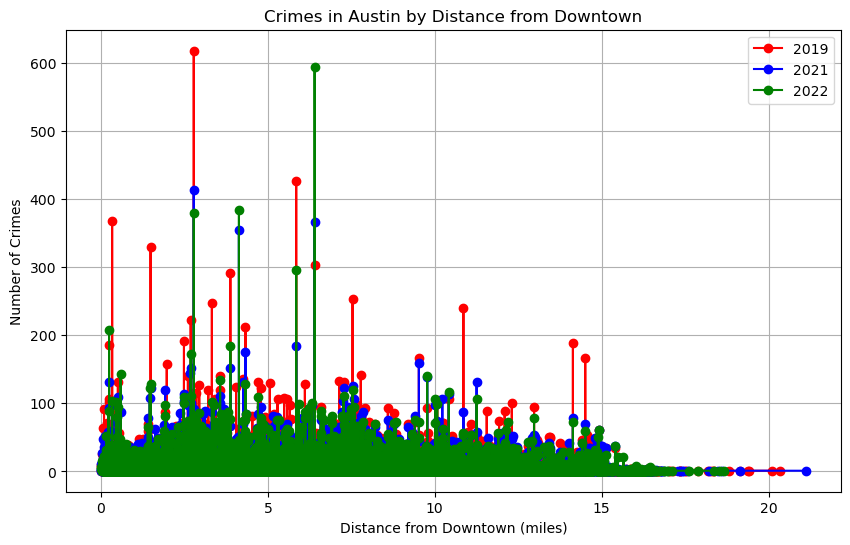

Top 5 Highest Offense Description for 2019:
BURGLARY OF VEHICLE               11693
FAMILY DISTURBANCE                10346
THEFT                              9386
CRIMINAL MISCHIEF                  5491
ASSAULT W/INJURY-FAM/DATE VIOL     3304
Name: Highest Offense Description, dtype: int64

Top 5 Highest Offense Description for 2021:
FAMILY DISTURBANCE     9629
THEFT                  5554
BURGLARY OF VEHICLE    4916
CRIMINAL MISCHIEF      4370
AUTO THEFT             4343
Name: Highest Offense Description, dtype: int64

Top 5 Highest Offense Description for 2022:
FAMILY DISTURBANCE     8447
BURGLARY OF VEHICLE    8017
THEFT                  5173
AUTO THEFT             5024
CRIMINAL MISCHIEF      4286
Name: Highest Offense Description, dtype: int64


In [55]:
# Define the coordinates for downtown Austin
downtown_lat = 30.2672
downtown_lon = -97.7431

# Assuming you have already defined 'combined_data' DataFrame

# Calculate the distance of each crime location from downtown
def calculate_distance(row):
    crime_coords = (row['Latitude'], row['Longitude'])
    downtown_coords = (downtown_lat, downtown_lon)
    return geopy.distance.geodesic(crime_coords, downtown_coords).miles

# Create 'Distance to Downtown (miles)' column by applying the calculate_distance function
combined_data['Distance to Downtown (miles)'] = combined_data.apply(calculate_distance, axis=1)

# Filter crimes within 100 miles from downtown
crimes_within_100_miles = combined_data[combined_data['Distance to Downtown (miles)'] <= 100]

# Filter to show only "Year" 2019, 2021, and 2022
crimes_within_100_miles_2019 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2019]
crimes_within_100_miles_2021 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2021]
crimes_within_100_miles_2022 = crimes_within_100_miles[crimes_within_100_miles['Year'] == 2022]

# Group crimes by distance from downtown and count the number of crimes in each group for each year
crime_counts_by_distance_2019 = crimes_within_100_miles_2019.groupby('Distance to Downtown (miles)').size().sort_index()
crime_counts_by_distance_2021 = crimes_within_100_miles_2021.groupby('Distance to Downtown (miles)').size().sort_index()
crime_counts_by_distance_2022 = crimes_within_100_miles_2022.groupby('Distance to Downtown (miles)').size().sort_index()

# Plot the line graphs for each year using different colors
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_distance_2019.index, crime_counts_by_distance_2019.values, marker='o', linestyle='-', label='2019', color='red')
plt.plot(crime_counts_by_distance_2021.index, crime_counts_by_distance_2021.values, marker='o', linestyle='-', label='2021', color='blue')
plt.plot(crime_counts_by_distance_2022.index, crime_counts_by_distance_2022.values, marker='o', linestyle='-', label='2022', color='green')
plt.xlabel('Distance from Downtown (miles)')
plt.ylabel('Number of Crimes')
plt.title('Crimes in Austin by Distance from Downtown')
plt.legend()
plt.grid(True)
plt.show()

# Filter the top 5 "Highest Offense Description" for each year
top_5_offense_2019 = crimes_within_100_miles_2019['Highest Offense Description'].value_counts().nlargest(5)
top_5_offense_2021 = crimes_within_100_miles_2021['Highest Offense Description'].value_counts().nlargest(5)
top_5_offense_2022 = crimes_within_100_miles_2022['Highest Offense Description'].value_counts().nlargest(5)

# # Display the top 5 offenses for each year
# print("Top 5 Highest Offense Description for 2019:")
# print(top_5_offense_2019)

# print("\nTop 5 Highest Offense Description for 2021:")
# print(top_5_offense_2021)

# print("\nTop 5 Highest Offense Description for 2022:")
# print(top_5_offense_2022)

In [ ]:
# crime_codes = {601: 'BURGLARY OF VEHICLE/NON RESIDENCE', 3400: 'FAMILY DISTURBANCE', 600: 'THEFT', 1400: 'CRIMINAL MISCHIEF',
#                900: 'ASSAULT W/INJURY-FAM/DATE VIOL', 700: 'AUTO THEFT', 2703: 'HARASSMENT', 902: 'ASSAULT BY CONTACT FAM/DATING/SEXUAL',
#                607: 'THEFT BY SHOPLIFTING', 3401: 'DISTURBANCE - OTHER',4022:'AGG ASSAULT FAM/DATE VIOLENCE',502:'BURGLARY NON RESIDENCE',
#                620:'THEFT CATALYTIC CONVERTER',2716:'CRIMINAL TRESPASS'}

# # Replace numeric offense codes with offense descriptions
# crime_df19['Highest Offense Description'] = crime_df19['Highest Offense Code'].replace(crime_codes)
# crime_df21['Highest Offense Description'] = crime_df21['Highest Offense Code'].replace(crime_codes)
# crime_df22['Highest Offense Description'] = crime_df22['Highest Offense Code'].replace(crime_codes)


# # Get the top 10 "Highest Offense Description"
# top10_19 = crime_df19['Highest Offense Description'].value_counts().head(5).reset_index()
# top10_21 = crime_df21['Highest Offense Description'].value_counts().head(5).reset_index()
# top10_22 = crime_df22['Highest Offense Description'].value_counts().head(5).reset_index()

# # Rename the columns for each year's top 10 DataFrame
# top10_19.columns = ['Highest Offense Description', 'Count']
# top10_21.columns = ['Highest Offense Description', 'Count']
# top10_22.columns = ['Highest Offense Description', 'Count']

# # Add "Year" column to each year's top 10 DataFrame
# top10_19['Year'] = 2019
# top10_21['Year'] = 2021
# top10_22['Year'] = 2022

# # Concatenate the DataFrames to include "Year" information
# combined_top10 = pd.concat([top10_19, top10_21, top10_22])

# print(combined_top10)





In [ ]:

# pivot_table = combined_top10.pivot_table(index=['Highest Offense Description'], columns='Year', values='Count',fill_value=0.5)


# # Plot the bar graph using pandas.plot with grouped bars for each year and different colors
# ax = pivot_table.plot(kind='bar', figsize=(12, 6), color=['green', 'blue', 'red'],alpha=.75)



# plt.xlabel('Highest Offense Description')
# plt.ylabel('Count')
# plt.title('Top 10 Highest Offense Descriptions from 2020 to 2022')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Year', labels=['2020', '2021', '2022'])

# # Set x and y-axis labels
# ax.set_xlabel('Highest Offense Description')
# ax.set_ylabel('Count')
# plt.grid(color="lightgray",linestyle="-",linewidth=.5)

# plt.tight_layout()
# plt.show()


In [32]:
# unique_zipcodes20 = pd.DataFrame({'Zip Codes':crime_df20['Zip Code'].unique()})
# unique_zipcodes21 = pd.DataFrame({'Zip Codes':crime_df21['Zip Code'].unique()})
# unique_zipcodes22 = pd.DataFrame({'Zip Codes':crime_df22['Zip Code'].unique()})

# unique_zipcodes20.dropna(inplace=True)
# unique_zipcodes21.dropna(inplace=True)
# unique_zipcodes22.dropna(inplace=True)

# unique_zipcodes20['Zip Codes'] = unique_zipcodes20['Zip Codes'].astype(int)
# unique_zipcodes21['Zip Codes'] = unique_zipcodes21['Zip Codes'].astype(int)
# unique_zipcodes22['Zip Codes'] = unique_zipcodes22['Zip Codes'].astype(int)


# print(unique_zipcodes20)
# print(unique_zipcodes21)
# print(unique_zipcodes22)


In [ ]:
# top_10_offenses = combined_top10['Highest Offense Description'].tolist()

# # Filter the original DataFrame for each year using the top 10 offense descriptions
# top_10_crimes_19 = crime_df19[crime_df19['Highest Offense Description'].isin(top_10_offenses)][['Highest Offense Description','Year','Zip Code','Address','Latitude', 'Longitude']]
# top_10_crimes_21 = crime_df21[crime_df21['Highest Offense Description'].isin(top_10_offenses)][['Highest Offense Description','Year','Zip Code','Address', 'Latitude', 'Longitude']]
# top_10_crimes_22 = crime_df22[crime_df22['Highest Offense Description'].isin(top_10_offenses)][['Highest Offense Description', 'Year','Zip Code','Address','Latitude', 'Longitude']]

# top_10_crimes_19.dropna(inplace=True)
# top_10_crimes_19['Zip Code'] = top_10_crimes_19['Zip Code'].astype(int)

# top_10_crimes_21.dropna(inplace=True)
# top_10_crimes_21['Zip Code'] = top_10_crimes_21['Zip Code'].astype(int)

# top_10_crimes_22.dropna(inplace=True)
# top_10_crimes_22['Zip Code'] = top_10_crimes_22['Zip Code'].astype(int)

# # Concatenate the DataFrames for all years
# all_top_10_crimes = pd.concat([top_10_crimes_19, top_10_crimes_21, top_10_crimes_22])


# all_top_10_crimes

In [ ]:
# # Function to categorize the location based on distance from downtown Austin
# def categorize_location(lat, lon):
#     distance = haversine(downtown_lat, downtown_lon, lat, lon)
    
#     if distance <= 23.36:    # 2.5 miles (Downtown)
#         return 'Downtown'
#     elif distance <= 5058.4:  # 7.5 miles (Midtown)
#         return 'Midtown'
#     elif distance <= 16093.44: # 10 miles (Suburbs)
#         return 'Suburbs'
#     else:                      # 15 miles (Outskirts)
#         return 'Outskirts'

# # Apply the categorize_location function to create the new 'Location Category' column
# top_10_crimes_19['Location Category'] = top_10_crimes_19.apply(lambda row: categorize_location(row['Latitude'], row['Longitude']), axis=1)

# top_10_crimes_19

In [ ]:
# offense_counts19 = top_10_crimes_19['Highest Offense Description'].value_counts()

# # Divide the counts by 100
# off_count100_20 = offense_counts19 / 100

# # Create a DataFrame from the 'off_count100_20' Series
# offense_counts_df = pd.DataFrame({'Highest Offense Description': off_count100_20.index,
#                                   'Normalized Count': off_count100_20.values})



# offense_counts_df


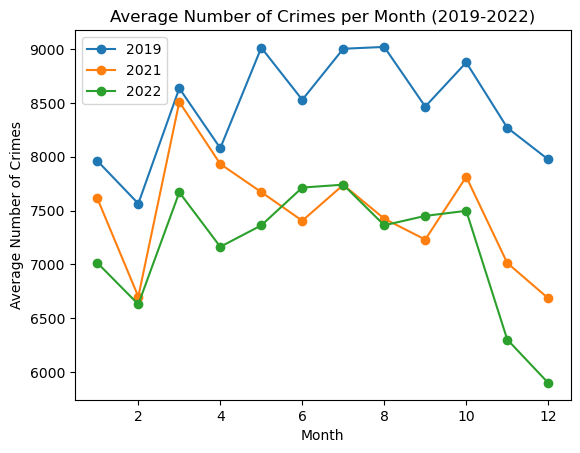

In [35]:
# # Create a line plot for each year
# plt.plot(crimes_by_zip_month_19['Month'], crimes_by_zip_month_19['No. of Crimes'], label='2019', marker='o')
# plt.plot(crimes_by_zip_month_21['Month'], crimes_by_zip_month_21['No. of Crimes'], label='2021', marker='o')
# plt.plot(crimes_by_zip_month_22['Month'], crimes_by_zip_month_22['No. of Crimes'], label='2022', marker='o')

# # Add labels and title
# plt.xlabel('Month')
# plt.ylabel('Average Number of Crimes')
# plt.title('Average Number of Crimes per Month (2019-2022)')

# # Add a legend to distinguish the years
# plt.legend()

# # Show the plot
# plt.show()

In [36]:
# import folium

# # Central point coordinates (Downtown Austin)
# downtown_lat = 30.2672
# downtown_lon = -97.7431

# # Create a map centered around downtown Austin
# map_center = [downtown_lat, downtown_lon]
# mymap = folium.Map(location=map_center, zoom_start=12)

# # Function to add a circle to the map
# def add_circle(lat, lon, radius, color):
#     folium.Circle(
#         location=[lat, lon],
#         radius=radius,
#         color=color,
#         fill=True,
#         fill_color=color
#     ).add_to(mymap)

# # Add circles to the map for the 5-mile and 10-mile radius
# add_circle(downtown_lat, downtown_lon, 4023.36, 'red')  # 2.5 miles in meters - Downtown
# add_circle(downtown_lat, downtown_lon, 10058.4, 'blue')  # 7.5 miles in meters - Midtown
# add_circle(downtown_lat, downtown_lon, 16093.44, 'green')  # 10 miles in meters - Suburbs
# add_circle(downtown_lat, downtown_lon, 24140.2, 'yellow')  # 15 miles in meters - Outskirts


# # Save the map to an HTML file or display it in the Jupyter Notebook
# mymap.save("map.html")
# mymap

In [ ]:
# import hvplot.pandas
# import holoviews as hv

# map2019 = top_10_crimes_19.hvplot.points("Longitude",
#                                          "Latitude",
#                                          geo=True,
#                                         color="Highest Offense Description",
#                                         alpha=1,
#                                         size='Normalized Count',
#                                         tiles="OSM",
#                                     hover_cols=["Address"],
#                                     frame_width=700,
#                                     frame_height=700)

# map2019


In [ ]:
# import hvplot.pandas
# import holoviews as hv

# map2021 = top_10_crimes_21.hvplot.points("Longitude",
#                                          "Latitude",
#                                          geo=True,
#                                         color="Highest Offense Description",
#                                         alpha=1,
#                                         #size='Normalized Count',
#                                         tiles="OSM",
#                                     hover_cols=["Address"],
#                                     frame_width=700,
#                                     frame_height=700)

# map2021

In [ ]:
# import hvplot.pandas
# import holoviews as hv

# map2022 = top_10_crimes_22.hvplot.points("Longitude",
#                                          "Latitude",
#                                          geo=True,
#                                         color="Highest Offense Description",
#                                         alpha=1,
#                                         #size='Normalized Count',
#                                         tiles="OSM",
#                                     hover_cols=["Address"],
#                                     frame_width=700,
#                                     frame_height=700)

# map2022

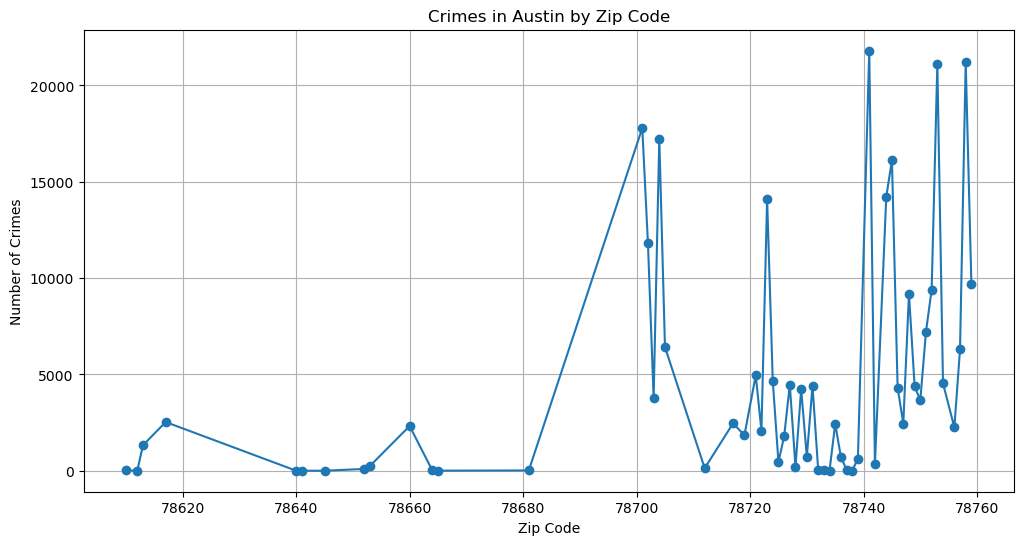

In [40]:
# # Group crimes by Zip Code and count the number of crimes in each group
# crime_counts_by_zipcode = combined_data['Zip Code'].value_counts()

# # Sort the data based on the Zip Code in ascending order
# crime_counts_by_zipcode = crime_counts_by_zipcode.sort_index()

# # Plot the line graph
# plt.figure(figsize=(12, 6))
# plt.plot(crime_counts_by_zipcode.index, crime_counts_by_zipcode.values, marker='o', linestyle='-')
# plt.xlabel('Zip Code')
# plt.ylabel('Number of Crimes')
# plt.title('Crimes in Austin by Zip Code')
# plt.grid(True)
# plt.show()


In [ ]:
# # Convert the "Date" column to datetime data type
# crime_df['Occurred Date Time'] = pd.to_datetime(crime_df['Occurred Date Time'])


# # Filter the data to only include records from the year 2020-2022
#     # crime_df_2022 = crime_df[crime_df['Occurred Date Time'].dt.year == 2022]
#     # crime_df_2021 = crime_df[crime_df['Occurred Date Time'].dt.year == 2021]
#     # crime_df_2020 = crime_df[crime_df['Occurred Date Time'].dt.year == 2020]
# crime_df_2020_2021_2022 = crime_df[crime_df['Occurred Date Time'].dt.year.isin([2020, 2021, 2022])]


# # Extract the month from the "Occurred Date" column and create a new column 'Month'
#     # crime_df_2022['Month'] = crime_df_2022['Occurred Date Time'].dt.month
#     # crime_df_2022['Year'] = crime_df_2022['Occurred Date Time'].dt.year
# crime_df_2020_2021_2022['Month'] = crime_df_2020_2021_2022['Occurred Date Time'].dt.month
# crime_df_2020_2021_2022['Year'] = crime_df_2020_2021_2022['Occurred Date Time'].dt.year



# # Filter the data to include only January, February, and March (months 1, 2, and 3)
#     # crime_df_months20 = crime_df_2020[crime_df_2020['Occurred Date Time'].dt.month.isin(range(1, 13))]
#     # crime_df_months21 = crime_df_2021[crime_df_2021['Occurred Date Time'].dt.month.isin(range(1, 13))]
#     # crime_df_months22 = crime_df_2022[crime_df_2022['Occurred Date Time'].dt.month.isin(range(1, 13))]


    
# # Group the data by "Zip Code" and calculate the average number of crimes per month in 2022
#     # average_crimes_2020 = crime_df_months20.groupby(['Zip Code', crime_df_months20['Occurred Date Time'].dt.month]).size().reset_index(name='Average Crimes')
#     # average_crimes_2021 = crime_df_months21.groupby(['Zip Code', crime_df_months21['Occurred Date Time'].dt.month]).size().reset_index(name='Average Crimes')
#     # average_crimes_2022 = crime_df_months22.groupby(['Zip Code', crime_df_months22['Occurred Date Time'].dt.month]).size().reset_index(name='Average Crimes')
# average_crimes_by_zip_month_year = crime_df_2020_2021_2022.groupby(['Zip Code', 'Month', 'Year']).size().reset_index(name='Average Crimes')



#     # average_crimes_2020 = average_crimes_2020[average_crimes_2020['Average Crimes'] > 100]
#     # average_crimes_2021 = average_crimes_2020[average_crimes_2020['Average Crimes'] > 100]
#     # average_crimes_2022 = average_crimes_2020[average_crimes_2020['Average Crimes'] > 100]
# average_crimes_over_100 = average_crimes_by_zip_month_year[average_crimes_by_zip_month_year['Average Crimes'] > 100]

# average_crimes_over_100.dropna(inplace=True)

# average_crimes_over_100['Zip Code'] = average_crimes_over_100['Zip Code'].astype(int)
# average_crimes_over_100['Zip Code'] = average_crimes_over_100['Average Crimes'].astype(int)

# average_crimes_over_100
